<div class="alert alert-info"><b>Описание проекта:</b>
   
# "Восстановление золота из золотосодержащей руды"

***

**Цели проекта:**
- предсказать коэффициент восстановления золота из золотосодержащей руды.
    
***
    
**Задачи исследования:**  
- проверить правильность расчета эффективности обогащения;
- исследовать изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки, а также суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
- построить модели ML и выбрать наилучшую по метрике sMAPE;
- проверить модель на тестовой выборке.
    
***
    
**Этапы исследования:** 
- загрузка и подготовка данных;
- анализ данных;
- построение моделей и выбор лучшей;
- общий вывод по исследованию.
    
***
    
В сооветствии с условиями решим задачу регрессии.
    
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных." data-toc-modified-id="Загрузка-и-подготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных.</a></span></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях.</a></span></li></ul></li><li><span><a href="#Построение-модели." data-toc-modified-id="Построение-модели.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели.</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей-и-выбор-лучшей." data-toc-modified-id="Обучение-разных-моделей-и-выбор-лучшей.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и выбор лучшей.</a></span></li><li><span><a href="#Применение-лучшей-модели-к-тестовой-выборке." data-toc-modified-id="Применение-лучшей-модели-к-тестовой-выборке.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Применение лучшей модели к тестовой выборке.</a></span></li><li><span><a href="#Проверка-модели-на-вменяемость." data-toc-modified-id="Проверка-модели-на-вменяемость.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на вменяемость.</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-исследованию:" data-toc-modified-id="Общий-вывод-по-исследованию:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод по исследованию:</a></span></li></ul></div>

***

### Загрузка и подготовка данных.

In [1]:
import warnings

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

# Константы
RANDOM_STATE = 12345

In [2]:
# Открываем файлы с данными. Признак 'date' сразу приведем к типу datetime64[ns].
try:
    data_full = pd.read_csv('C:\Датасеты и проекты/gold_recovery_full_new.csv', parse_dates=['date'])   # Исходные данные
    data_train = pd.read_csv('C:\Датасеты и проекты/gold_recovery_train_new.csv', parse_dates=['date']) # Обучающая выборка
    data_test = pd.read_csv('C:\Датасеты и проекты/gold_recovery_test_new.csv', parse_dates=['date'])   # Тестовая выборка
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=['date'])
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates=['date'])
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=['date'])

In [3]:
# Выводим первые 5 строк датасета с исходными данными.
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
# Выводим первые 5 строк обучающей выборки.
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
# Выводим первые 5 строк тестовой выборки.
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [6]:
# Цикл для получения информации о датасетах.
data_all = [data_full, data_train, data_test]
data_names = ['Исходные данные', 'Обучающая выборка', 'Тестовая выборка']

for i in range(len(data_all)):
        print(f'Количество строк и столбцов в датасете "{data_names[i]}": {data_all[i].shape}')
        print('-' * 30)
        print(f'Пропуски в датасете "{data_names[i]}":\n{data_all[i].isna().sum()}')
        print('-' * 30)
        print(f'Количество явных дубликатов в датасете "{data_names[i]}": {data_all[i].duplicated().sum()}')
        print('-' * 30)
        print(f'Информация о типах данных в датасете "{data_names[i]}":\n{data_all[i].dtypes}')
        print('<-->' * 15,'\n')        

Количество строк и столбцов в датасете "Исходные данные": (19439, 87)
------------------------------
Пропуски в датасете "Исходные данные":
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
------------------------------
Количество явных дубликатов в датасете "Исходные данные": 0
------------------------------
Информация о типах данных в датасете "Исходные данные":
date                                          datetime64[ns]
final.output.concentrate_ag                   

 <div class="alert alert-info"><b>Наблюдения:</b>
   
По результатам получения информации о датасетах прослеживается:
* В данных имеются пропуски
* В тестовой выборке отсутствуют некоторые признаки
* Явных дубликатов в датасетах не выявлено
    
</div>

In [7]:
# Заполним пропуски в датасетах ближайшими значениями из предыдущих строк (метод - 'ffill').
data_full = data_full.fillna(method='ffill')
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

In [8]:
# Эффективность обогащения рассчитывается по формуле: recovery = ((c*(f-t))/(f*(c-t))) * 100
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100
print('Значение MAE:', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

Значение MAE: 9.73512347450521e-15


 <div class="alert alert-info"><b>Наблюдения:</b>
   
Отклонение значения признака 'rougher.output.recovery' от расчетных значений крайне мало, значит эффективность обогащения рассчитана правильно, а применение метода 'ffill' при заполнении пропусков не сильно повлияло на данные в целом.
</div>

In [9]:
# Узнаем, какие признаки отсутствуют в тестовой выборке.
columns_absent = set(data_train.columns) - set(data_test.columns)
columns_absent

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

 <div class="alert alert-info"><b>Наблюдения:</b>
   
В тестовой выборке отсутствуют:
* признаки, описывающиме характеристики полезных металлов в концентратах и хвостах после каждого из этапов очистки, а также на финальном этапе;
* значения эффективности обогащения на этапе флотации и на финальном этапе;
* расчетные характеристики на этапе флотации.
    
</div>

In [10]:
# Узнаем, к какому типу данных относятся значения отсутствующих признаков.
data_train[columns_absent].dtypes

primary_cleaner.output.tail_pb                        float64
secondary_cleaner.output.tail_pb                      float64
primary_cleaner.output.tail_ag                        float64
rougher.output.tail_au                                float64
rougher.output.concentrate_au                         float64
final.output.tail_sol                                 float64
final.output.tail_pb                                  float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
primary_cleaner.output.concentrate_pb                 float64
rougher.output.tail_pb                                float64
rougher.output.concentrate_sol                        float64
primary_cleaner.output.tail_sol                       float64
rougher.output.tail_sol                               float64
final.output.concentrate_au                           float64
rougher.calculation.au_pb_ratio                       float64
final.output.concentrate_ag                           float64
rougher.

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Значения отсутствующих в тестовой выборке признаков относятся к типу данных float64.
    
</div>

 <div class="alert alert-info"><b>Комментарий:</b>
  
Согласно условию задачи отсутствущие параметры замеряются и/или рассчитываются значительно позже.   
В соответствии с целью исследования - предсказать коэффициент восстановления золота из золотосодержащей руды, указанные параметры и не должны присутствовать в тестовой выборке, поскольку данные значения не могут быть известны.
    
</div>

In [11]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')
data_test.shape

(5290, 55)

<div class="alert alert-info"><b>Комментарий:</b>

Поскольку целевыми признаками являются эффективность обогащения чернового концентрата (rougher.output.recovery) и эффективность обогащения финального концентрата (final.output.recovery), то их значения из исходного датасета для оценки качества модели добавим в тестовую выборку по колонке 'date'.

</div>

<div class="alert alert-info"><b>Промежуточные выводы:</b>

На данном этапе выполнены следующие действия:
- признак 'date' при считывании всех трех датасетов сразу приведен к типу datetime64[ns].
- исследованы типы данных в остальных признаках, типы данных соответствуют.
- изучена информация о датасетах, в датасетах обнаружены пропуски.
- согласно условию задачи "соседние по времени параметры часто похожи", на основании чего обнаруженные пропуски в датасетах заполнили ближайшими значениями из предыдущих строк (метод - 'ffill').
- рассчитали эффективность обогащения на основе имеющихся данных по формуле и сравнили с имеющимися в обучающей выборке значениями ('rougher.output.recovery'). MAE составило 9.73512347450521e-15, что практически близко к нулю. Заполнение пропусков методом 'ffill' оправданно.
- установили, что в тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей выборке. Согласно условию задачи отсутствущие параметры замеряются и/или рассчитываются значительно позже. В результате чего пришли к выводу, что указанные параметры и не должны присутствовать в тестовой выборке.
- дополнили тестовые данные столбцами с соответствующими значениями целевых признаков из исходного датасета.

</div>

***

### Анализ данных.

In [12]:
# Посмотрим распределение численных значений признаков в обучающей выборке.
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14149.0,5.141921,1.369603,0.000000,4.211500,4.994607,5.859495,16.001945
final.output.concentrate_pb,14149.0,10.132848,1.654925,0.000000,9.296833,10.297013,11.170578,17.031899
final.output.concentrate_sol,14149.0,9.109311,2.886929,0.000000,7.422466,8.801909,10.452148,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14149.0,-483.957839,37.892065,-797.142475,-500.363203,-499.702479,-487.864322,-275.073125
secondary_cleaner.state.floatbank5_b_air,14149.0,13.064236,5.765567,0.646208,8.994384,11.997537,17.982826,27.926001
secondary_cleaner.state.floatbank5_b_level,14149.0,-483.967726,39.206771,-800.006180,-500.105994,-499.914556,-453.274822,-157.396071
secondary_cleaner.state.floatbank6_a_air,14149.0,19.576675,5.764496,0.195324,14.989244,19.984165,24.991615,32.188906


 <div class="alert alert-info"><b>Комментарий:</b>
   
Имеются нулевые значения признаков. Указанные значения могут негативно отразиться на обучении моделей. Также при первичном исследовании изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки на графиках прослеживались выбросы в районе нуля. Я решил заменить нулевые значения признаков медианными значениями по столбцам с соответствующими признаками.
</div>

#### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [13]:
# Нулевые значения заменим на NaN.
data_train.replace(0, np.nan, inplace=True)

In [14]:
# Циклом заменим значения NaN медианными значениями по столбцам с признаками.
for i in data_train.columns:
    data_train[str(i)] = data_train[str(i)].fillna(data_train[str(i)].median())

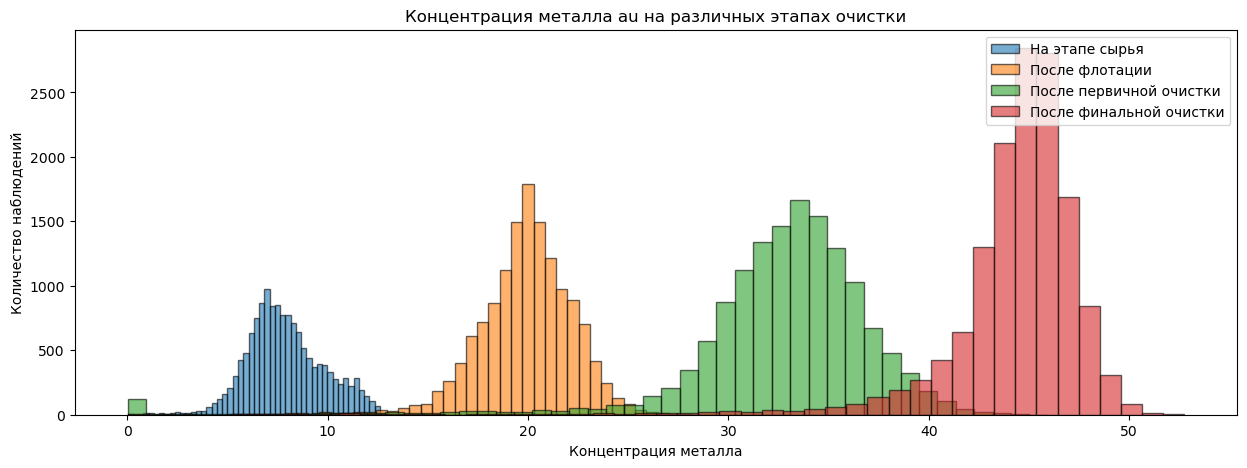

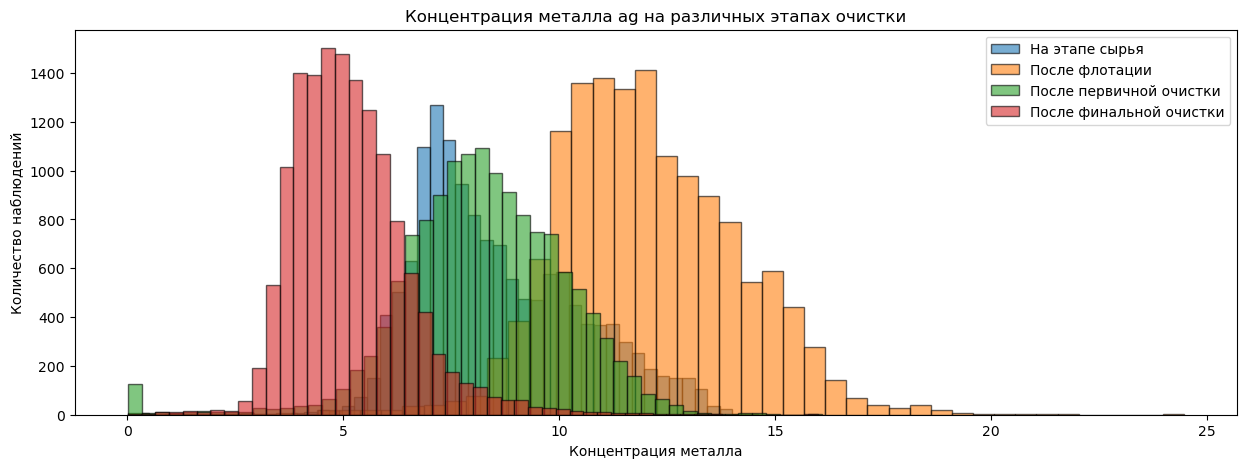

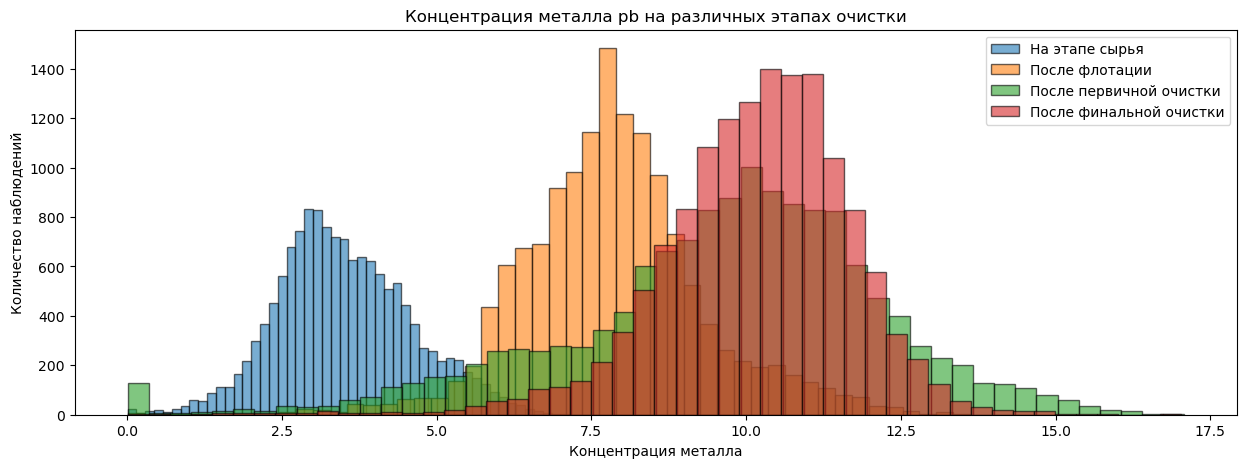

In [15]:
# Визуализируем изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.
for i in ['au', 'ag', 'pb']:
    plt.figure(figsize=[15, 5])
    plt.title(f'Концентрация металла {i} на различных этапах очистки')
        
    plt.hist(data_train[f'rougher.input.feed_{i}'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='На этапе сырья')
    plt.hist(data_train[f'rougher.output.concentrate_{i}'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='После флотации')
    plt.hist(data_train[f'primary_cleaner.output.concentrate_{i}'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='После первичной очистки')
    plt.hist(data_train[f'final.output.concentrate_{i}'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='После финальной очистки')
    
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend(loc='upper right') 


 <div class="alert alert-info"><b>Наблюдения:</b>
    
Концентрация золота последовательно увеличивается, достигая максимальных значений после финальной очистки.
     
Концентрация серебра увеличивается до этапа флотации, а потом начинает снижаться до минимальных значений после финальной очистки.
    
Концентрация свинца увеличивается до этапа первичной очистки, достигая качественного улучшения после финальной очистки.

</div>

####  Распределение размеров гранул сырья на обучающей и тестовой выборках.

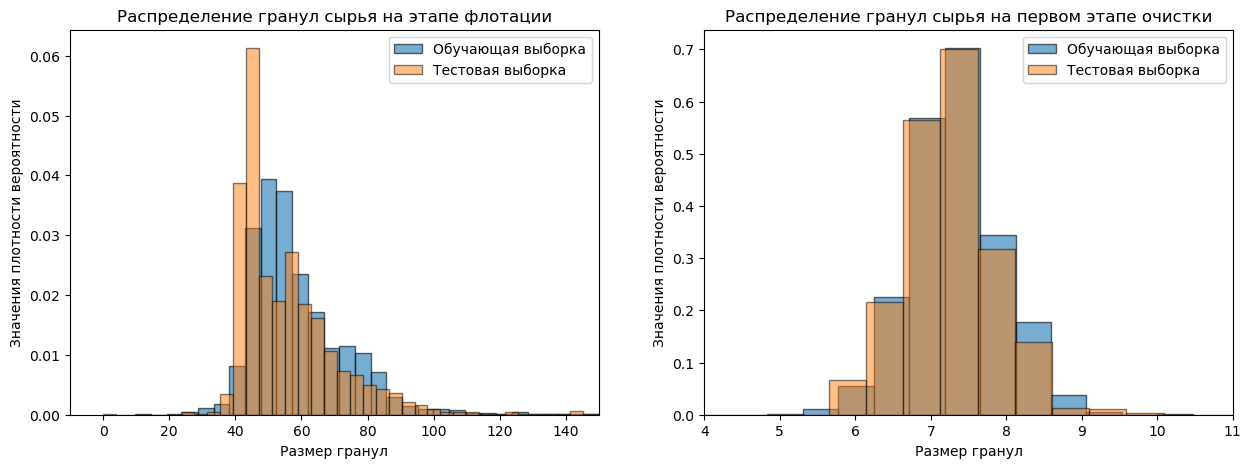

In [16]:
# Распределение гранул сырья исследуем через оценку значений плотности вероятности.

fig, axes = plt.subplots(1 ,2, figsize=(15,5))

axes[0].hist(data_train['rougher.input.feed_size'], 
             edgecolor = 'black',
             bins = 100,
             label='Обучающая выборка', 
             density=True, 
             alpha=0.6)
axes[0].hist(data_test['rougher.input.feed_size'], 
             edgecolor = 'black',
             bins = 100,
             label='Тестовая выборка', 
             density=True, 
             alpha=0.5)
axes[0].set_xlim([-10, 150])
axes[0].legend(loc='upper right')
axes[0].set_title('Распределение гранул сырья на этапе флотации')
axes[0].set(xlabel='Размер гранул')
axes[0].set(ylabel='Значения плотности вероятности')

axes[1].hist(data_train['primary_cleaner.input.feed_size'], 
             edgecolor = 'black', 
             bins = 20,
             label='Обучающая выборка', 
             density=True, 
             alpha=0.6)
axes[1].hist(data_test['primary_cleaner.input.feed_size'], 
             edgecolor = 'black', 
             bins = 20,
             label='Тестовая выборка', 
             density=True, 
             alpha=0.5)
axes[1].set_xlim([4, 11])
axes[1].legend(loc='upper right')
axes[1].set_title('Распределение гранул сырья на первом этапе очистки')
axes[1].set(xlabel='Размер гранул')
axes[1].set(ylabel='Значения плотности вероятности');

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Визуализация значений плотности вероятности распределения гранул сырья на этапе флотации показывает, что распределения похожи.   
Визуализация значений плотности вероятности распределения гранул сырья на первом этапе очистки указывает практически на полное совпадение распределений.  
Таким образом, указанные данные можно использовать для построения модели ML и оценки ее качества.
    
</div>

#### Исследование суммарной концентрации всех веществ на разных стадиях.

In [17]:
# Суммарная концентрация всех веществ на стадии сырья.
rougher_input_sum_concentrate = data_train[['rougher.input.feed_au',
                                           'rougher.input.feed_ag',
                                           'rougher.input.feed_pb']].sum(axis= 1)

# Суммарная концентрация всех веществ после флотации.
rougher_output_sum_concentrate = data_train[['rougher.output.concentrate_au', 
                                            'rougher.output.concentrate_ag', 
                                            'rougher.output.concentrate_pb']].sum(axis= 1)

# Суммарная концентрация всех веществ после после финальной очистки.
final_output_sum_concentrate = data_train[['final.output.concentrate_ag', 
                                          'final.output.concentrate_pb',
                                          'final.output.concentrate_au']].sum(axis= 1)

total_sum_concentrate = [rougher_input_sum_concentrate, rougher_output_sum_concentrate, final_output_sum_concentrate]

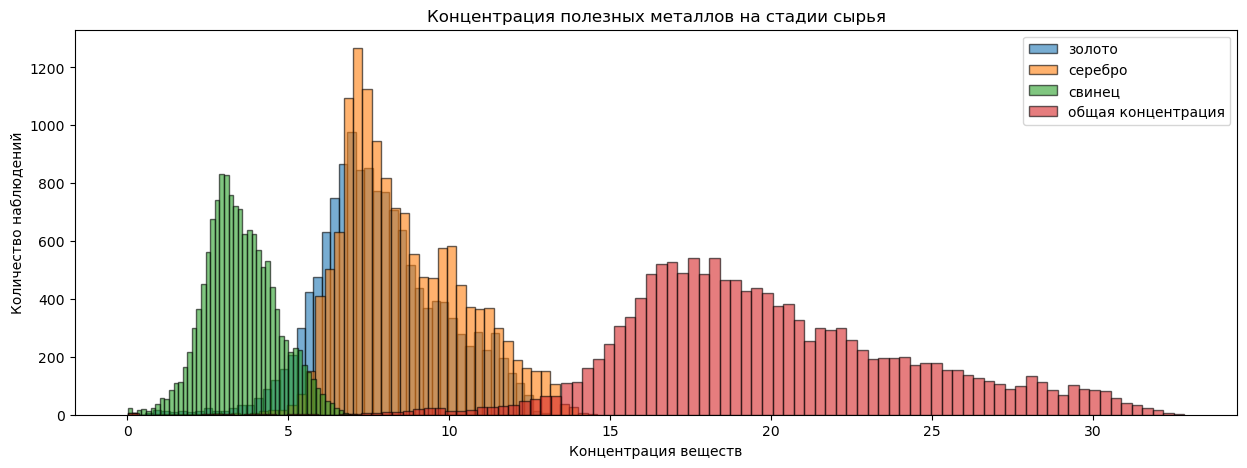

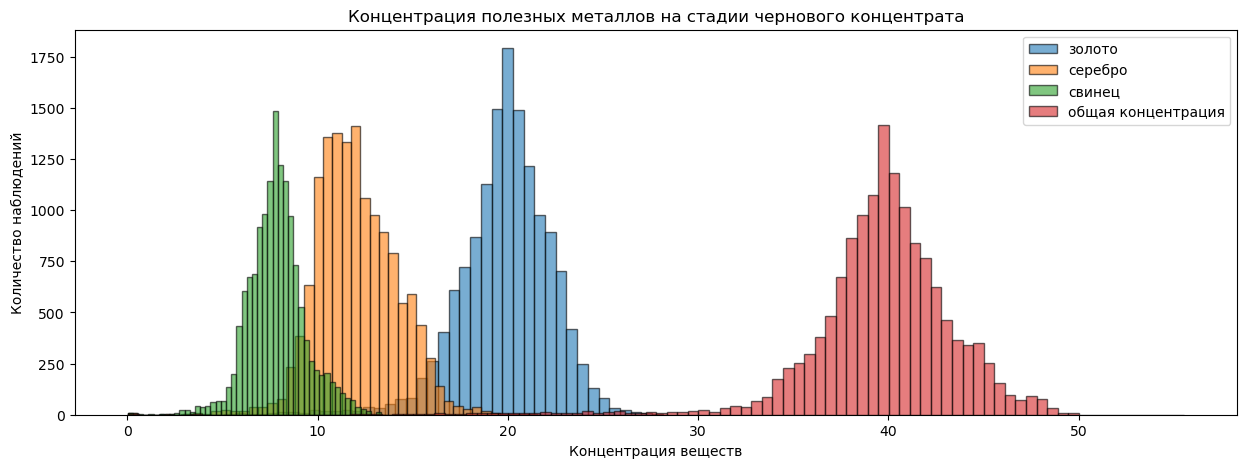

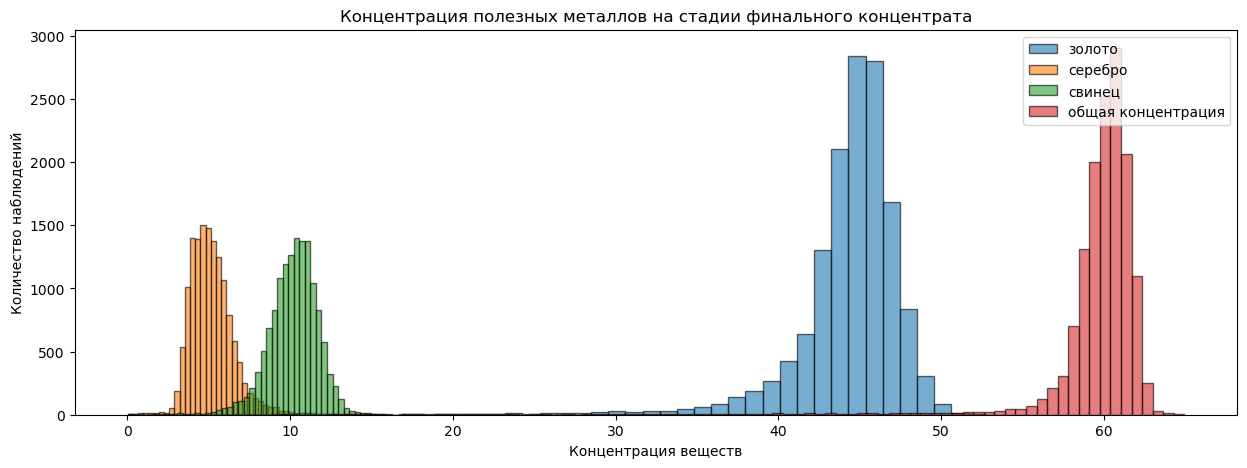

In [18]:
# Визуализируем концентрацию полезных металлов (Au, Ag, Pb) на различных этапах очистки.
stages_1 = ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']
names_of_stages = ['сырья', 'чернового концентрата', 'финального концентрата']

for i in range(3):
    plt.figure(figsize=[15, 5])
    plt.title(f'Концентрация полезных металлов на стадии {names_of_stages[i]}')
        
    plt.hist(data_train[f'{stages_1[i]}au'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='золото')
    plt.hist(data_train[f'{stages_1[i]}ag'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='серебро')
    plt.hist(data_train[f'{stages_1[i]}pb'], 
             edgecolor = 'black', 
             bins=50, 
             alpha=0.6, 
             label='свинец')
    plt.hist(total_sum_concentrate[i], 
             edgecolor = 'black', 
             bins=100, 
             alpha=0.6, 
             label='общая концентрация')
        
    plt.xlabel('Концентрация веществ')
    plt.ylabel('Количество наблюдений')
    plt.legend(loc='upper right')    

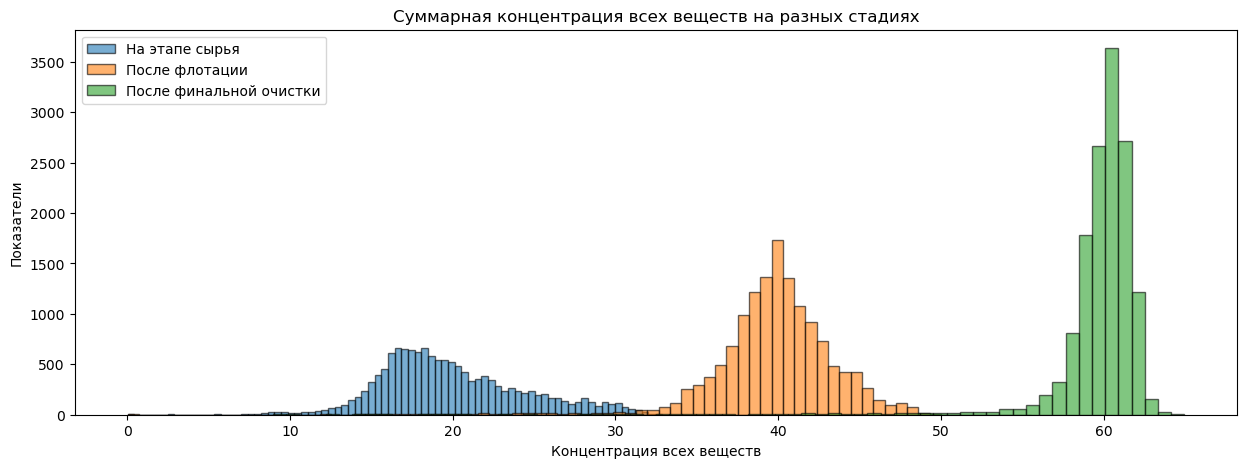

In [19]:
# Визуализируем суммарные концентрации всех металлов на различных этапах очистки.
plt.figure(figsize=[15, 5])
plt.title('Суммарная концентрация всех веществ на разных стадиях')

stages = ['На этапе сырья', 'После флотации', 'После финальной очистки']

calculations = [rougher_input_sum_concentrate, 
                rougher_output_sum_concentrate, 
                final_output_sum_concentrate]

for i in range(len(calculations)):
    plt.hist(calculations[i], edgecolor = 'black', bins=80, alpha=0.6, label=stages[i])
    
plt.xlabel('Концентрация всех веществ')
plt.ylabel('Показатели')
plt.legend(loc='upper left');

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Исследование суммарной концентрации всех веществ на разных стадиях (в сырье, в черновом и финальном концентратах) показывает, что концентрация золота и свинца до стадии финального концентрата увеличивается, тогда как серебра падает. При этом видно, что сильнее всего увеличивается от этапа очистки к этапу концентрация золота.
    
</div>

<div class="alert alert-info"><b>Промежуточные выводы:</b>

На данном этапе выполнены следующие действия:
- при изучении распределения численных значений признаков в обучающей выборке были обнаружены нулевые значения, которые могут негативно отразиться на обучении моделей. Нулевые значения заменены на медианные.
- проанализировано изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.   
- изучено распределение размеров гранул сырья на обучающей и тестовой выборках. Распределения между выборками похожи, поэтому указанные данные можно использовать для построения модели ML и оценки ее качества.
- исследована суммарная концентрация всех веществ на разных стадиях. При этом было установлено, что сильнее всего увеличивается от этапа очистки к этапу концентрация золота.    
 
</div>

***

### Построение модели.

In [20]:
# В связи с тем, что качество моделей будет оцениваться исключительно на основе данных, представленных в тестовой выборке, то
# в целях исключения утечки данных при построении моделей выберем признаки, которые необходимо удалить из обучающей выборки.

columns_absent_to_delete = columns_absent - set(['rougher.output.recovery','final.output.recovery'])
columns_absent_to_delete

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

In [21]:
# Удалим выбранные признаки из обучающей выборки.
data_train = data_train.drop(columns=columns_absent_to_delete, axis=1)
data_train.shape

(14149, 55)

<div class="alert alert-info"><b>Комментарий:</b>

Теперь мы получили одинаковое количество признаков в обучающей и тестовой выборках.

</div>

####  Функция для вычисления итоговой sMAPE.

In [22]:
# Напишем функцию для вычисления sMAPE.
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [23]:
# Создадим переменную для расчета в процессе кросс-валидации метрики sMAPE.
smape_scorer = make_scorer(smape, greater_is_better = False)

In [24]:
# Напишем функцию для вычисления итоговой sMAPE.
def smape_total(rougher, final):
    return (0.25 * rougher + 0.75 * final)

#### Обучение разных моделей и выбор лучшей.

<div class="alert alert-info"><b>Комментарий:</b>

Поскольку численные данные полностью готовы для построения моделей машиного обучения, признак 'date' в обучающей и тестовой выборках можно удалить.

</div>

In [25]:
# Разделим обучающие данные для построения моделей ml. Удалим признак 'date' и целевые признаки в обучающей выборке.
features_train = data_train.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
target_train_r = data_train['rougher.output.recovery']
target_train_f = data_train['final.output.recovery']
print(features_train.shape)
print(target_train_r.shape)
print(target_train_f.shape)

(14149, 52)
(14149,)
(14149,)


In [26]:
# Выполним стандартизацию непрерывных переменных.
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)

In [27]:
%%time 
# Построим модели LinearRegression для кросс-валидации и расчитаем итоговое sMAPE.

model_linreg_r = LinearRegression()
scores_r = cross_val_score(model_linreg_r, 
                         features_train, 
                         target_train_r,
                         scoring = smape_scorer,
                         n_jobs = -1,
                         cv=5) 
final_score_r = sum(scores_r) / len(scores_r)

model_linreg_f = LinearRegression()
scores_f = cross_val_score(model_linreg_f, 
                         features_train, 
                         target_train_f,
                         scoring = smape_scorer,
                         n_jobs = -1,
                         cv=5) 
final_score_f = sum(scores_f) / len(scores_f)

smape_final = abs(smape_total(final_score_r, final_score_f))
print('Итоговое sMAPE модели LinearRegression:', smape_final)

Итоговое sMAPE модели LinearRegression: 10.014030240800844
Wall time: 6.9 s


In [28]:
%%time 
# Построим модели DecisionTreeRegressor для кросс-валидации и расчитаем лучшее итоговое sMAPE.

best_result_tree = 100
best_depth_tree = 0

for depth in range(1, 15):
    model_destree_r = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=depth)
    scores_r = cross_val_score(model_destree_r, 
                                features_train, 
                                target_train_r,
                                scoring = smape_scorer,
                                n_jobs = -1,
                                cv=5) 
    final_score_r = sum(scores_r) / len(scores_r)

    model_destree_f = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=depth)
    scores_f = cross_val_score(model_destree_f, 
                                features_train, 
                                target_train_f,
                                scoring = smape_scorer,
                                n_jobs = -1,
                                cv=5) 
    final_score_f = sum(scores_f) / len(scores_f)

    smape_final = abs(smape_total(final_score_r, final_score_f))
    if smape_final < best_result_tree:
        best_result_tree = smape_final
        best_depth_tree = depth        
        
print('Лучшее sMAPE модели DecisionTreeRegressor:', best_result_tree, ', глубина дерева:', best_depth_tree)

Лучшее sMAPE модели DecisionTreeRegressor: 8.910078432000569 , глубина дерева: 3
Wall time: 39.6 s


In [29]:
%%time
# Построим модели RandomForestRegressor для кросс-валидации и расчитаем лучшее итоговое sMAPE.

best_result_forest = 100
best_est_forest = 0
best_depth_forest = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_forest_r = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        scores_r = cross_val_score(model_forest_r, 
                                  features_train, 
                                  target_train_r,
                                  scoring = smape_scorer,
                                  verbose=10,
                                  n_jobs = -1,
                                  cv=5) 
        final_score_r = sum(scores_r) / len(scores_r)

        model_forest_f = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        scores_f = cross_val_score(model_forest_f, 
                                   features_train, 
                                   target_train_f,
                                   scoring = smape_scorer,
                                   verbose=10,
                                   n_jobs = -1,
                                   cv=5) 
        final_score_f = sum(scores_f) / len(scores_f)

        smape_final = abs(smape_total(final_score_r, final_score_f))
        if smape_final < best_result_forest:
            best_result_forest = smape_final
            best_depth_forest = depth
            best_est_forest = est
            
print('Лучшее sMAPE модели RandomForestRegressor:', best_result_forest,
      'глубина дерева:', best_depth_forest,
      'количество деревьев:', best_est_forest)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.2s r

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    5.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   10.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.6s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.9s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.3s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.3s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.8s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

Лучшее sMAPE модели RandomForestRegressor: 8.42540861228336 глубина дерева: 4 количество деревьев: 10
Wall time: 25min 24s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.3s finished


<div class="alert alert-info"><b>Комментарий:</b>

Лучший результат метрики итоговой sMAPE показала модель RandomForestRegressor: 8.42540861228336, с количеством деревьев 10 и глубиной дерева 4.

</div>

#### Применение лучшей модели к тестовой выборке.

In [30]:
# Разделим тестовые данные для применения лушей модели ml. Удалим признак 'date' и целевые признаки в тестовой выборке.
features_test = data_test.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
target_test_r = data_test['rougher.output.recovery']
target_test_f = data_test['final.output.recovery']
print(features_test.shape)
print(target_test_r.shape)
print(target_test_f.shape)

(5290, 52)
(5290,)
(5290,)


In [31]:
# Обучим лучшую модель на обучающей выборке по признаку 'rougher.output.recovery'. Предскажем на тестовой выборке.
model_best_r = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=10, max_depth=4)
model_best_r.fit(features_train, target_train_r)
predict_r = model_best_r.predict(features_test)

In [32]:
# Обучим лучшую модель на обучающей выборке по признаку 'final.output.recovery'. Предскажем на тестовой выборке.
model_best_f = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=10, max_depth=4)
model_best_f.fit(features_train, target_train_f)
predict_f = model_best_f.predict(features_test)

In [33]:
# Рассчитаем значения sMAPE для целевых признаков тестовых данных.
smape_r = smape(target_test_r, predict_r)
smape_f = smape(target_test_f, predict_f)

# Рассчитаем итоговое sMAPE на целевых признаках тестовых данных.
final_smape_rf = smape_total(smape_r, smape_f)
final_smape_rf

9.528560512807566

<div class="alert alert-info"><b>Комментарий:</b>

По результатам применения лучшей модели на тестовых данных получили значение итогового sMAPE: 9.528560512807566.

</div>

#### Проверка модели на вменяемость.

In [34]:
# Используем DummyRegressor.
# Обучим модель DummyRegressor на обучающей выборке по целевым признакам. Предскажем на тестовой выборке.
model_dummy_r = DummyRegressor(strategy="mean")
model_dummy_r.fit(features_train, target_train_r)
dummy_predict_r = model_dummy_r.predict(features_test)

model_dummy_f = DummyRegressor(strategy="mean")
model_dummy_f.fit(features_train, target_train_f)
dummy_predict_f = model_dummy_f.predict(features_test)

# Рассчитаем значения sMAPE для целевых признаков тестовых данных.
smape_dummy_r = smape(target_test_r, dummy_predict_r)
smape_dummy_f = smape(target_test_f, dummy_predict_f)

# Рассчитаем итоговое sMAPE на целевых признаках тестовых данных.
final_smape_dummy_rf = smape_total(smape_dummy_r, smape_dummy_f)
final_smape_dummy_rf

9.838339591835638

<div class="alert alert-info"><b>Комментарий:</b>

Результат RandomForestRegressor: 9.528560512807566.   
Результат DummyRegressor: 9.838339591835638.
    
Выбранная нами модель RandomForestRegressor показывает результат лучше случайного, модель может применяться.

</div>

***

 <div class="alert alert-info"><b><h3>Общий вывод по исследованию:</h4></b>

В целях решения поставленных задач:
* была проверена правильность расчета эффективностм обогащения;
* исследованы изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки, а также суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
* построены модели ML и выбрана наилучшая по метрике sMAPE, которая была проверена на тестовой выборке.
   
Лучший результат метрики итоговой sMAPE показала модель RandomForestRegressor: 8.42540861228336, с количеством деревьев 10 и глубиной дерева 4.   
По результатам применения лучшей модели на тестовых данных получили значение итогового sMAPE: 9.528560512807566.     
При проверке на вменяемость выбранная нами модель RandomForestRegressor показала результат лучше случайного, модель может применяться.

</div>